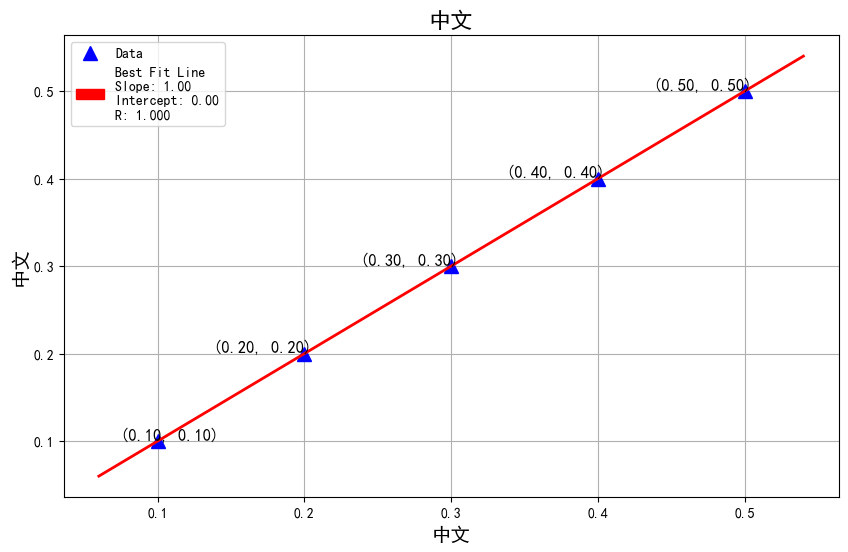

Results of 中文:
Best Fit Line
Slope: 1.00
Intercept: 0.00
R: 1.000


In [71]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from adjustText import adjust_text

def linear_fit_plot(x, y, title='Linear Fit', x_label='x', y_label='y',
                    data_annotation='({:.2f}, {:.2f})',
                    slope_annotation='{:.2f}',
                    intercept_annotation='{:.2f}',
                    r_value_annotation='{:.3f}'):
    '''
    Plot the data and the linear fit.
    Annotations of the slope, intercept, and R value are included in the legend.
    Annotate the x and y values of the data points.
    '''
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    # Create the best fit line, slightly outside the data range
    extended_x_range = np.array([min(x) - 0.1 * (max(x) - min(x)), max(x) + 0.1 * (max(x) - min(x))])
    best_fit_line = slope * extended_x_range + intercept
    # Change the font to support Chinese characters
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(10, 6))  # Increase the size of the plot
    # Plot the data
    plt.plot(x, y, 'b^', label='Data', markersize=10)  # Use circle markers and increase size
    # Annotate the x and y values of the data points
    texts = []
    for i in range(len(x)):
        texts.append(plt.text(x[i], y[i], data_annotation.format(x[i], y[i]), fontsize=12,
                              ha='right', va='bottom'))
    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    plt.plot(extended_x_range, best_fit_line, 'r-', linewidth=2)
    # Add labels and title
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.title(title, fontsize=16)
    # Add legend with slope, intercept, and R value
    legend_text = f'Best Fit Line\nSlope: {slope_annotation.format(slope)}\nIntercept: {intercept_annotation.format(intercept)}\nR: {r_value_annotation.format(r_value)}'
    plt.legend(['Data', legend_text], loc='best')
    plt.grid(True)  # Add grid
    # Show the plot
    plt.show()
    # Log the results
    print(f"Results of {title}:", legend_text, sep='\n')

x = np.array([1, 2, 3, 4, 5]) * 0.1
y = np.array([1, 2, 3, 4, 5]) * 0.1
linear_fit_plot(x, y, "中文", "中文", "中文")


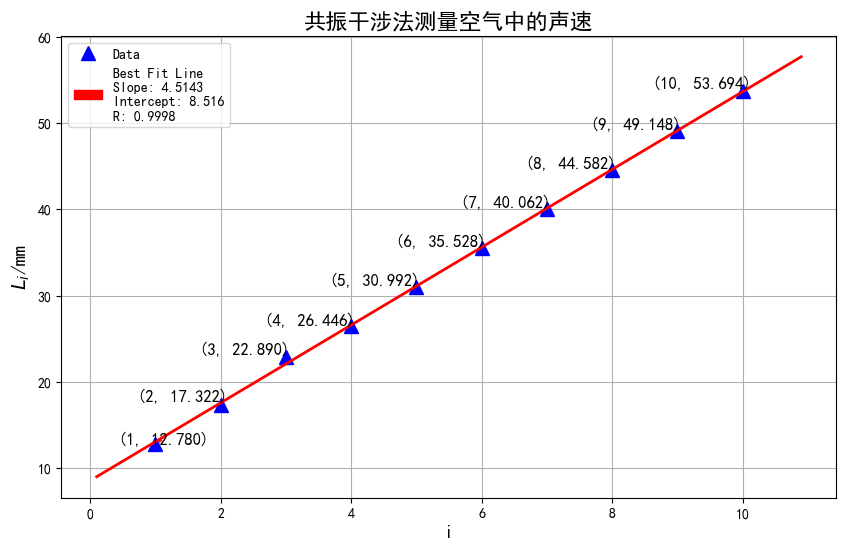

Results of 共振干涉法测量空气中的声速:
Best Fit Line
Slope: 4.5143
Intercept: 8.516
R: 0.9998
共振干涉法测量空气中的声速: 348.68 m/s


In [72]:
# Extracted data
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([12.780, 17.322, 22.890, 26.446, 30.992, 35.528, 40.062, 44.582, 49.148, 53.694])

# Call the linear_fit_plot function
linear_fit_plot(x, y, title='共振干涉法测量空气中的声速', x_label='i', y_label='$L_i$/mm',
				data_annotation='({:.0f}, {:.3f})',
				slope_annotation='{:.4f}',
				intercept_annotation='{:.3f}',
				r_value_annotation='{:.4f}')

# Calculations for the first dataset
frequency = 38.620 * 10**3  # in Hz
slope_resonance, intercept_resonance, r_value_resonance, p_value_resonance, std_err_resonance = stats.linregress(x, y)
slope_resonance = slope_resonance / 1000  # convert mm to m
speed_resonance = 2 * slope_resonance * frequency  # speed = 2 * slope * frequency
print(f"共振干涉法测量空气中的声速: {speed_resonance:.2f} m/s")


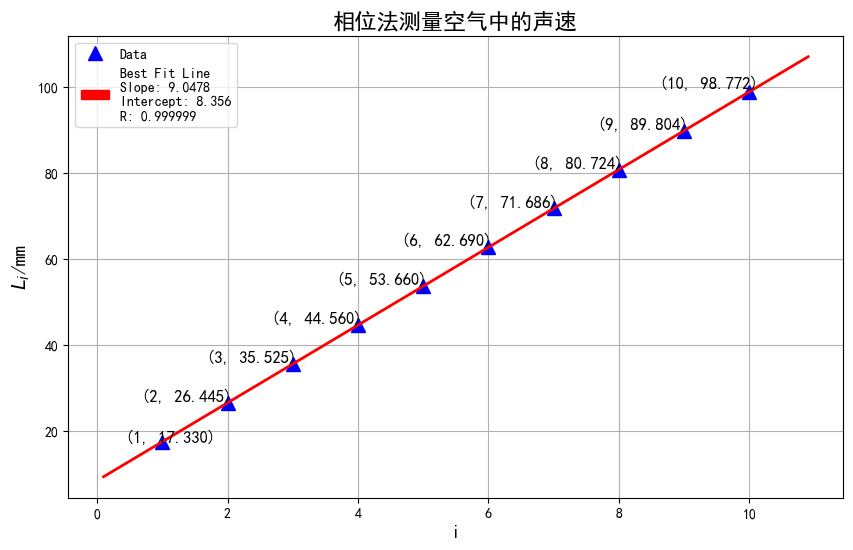

Results of 相位法测量空气中的声速:
Best Fit Line
Slope: 9.0478
Intercept: 8.356
R: 0.999999
相位法测量空气中的声速: 349.43 m/s


In [79]:
# Extracted data for the second dataset
x2 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y2 = np.array([17.330, 26.445, 35.525, 44.560, 53.660, 62.690, 71.686, 80.724, 89.804, 98.772])

# Call the linear_fit_plot function for the second dataset
linear_fit_plot(x2, y2, title='相位法测量空气中的声速', x_label='i', y_label='$L_i$/mm',
                data_annotation='({:.0f}, {:.3f})',
                slope_annotation='{:.4f}',
                intercept_annotation='{:.3f}',
                r_value_annotation='{:.6f}')

# Calculations for the second dataset
slope_phase, intercept_phase, r_value_phase, p_value_phase, std_err_phase = stats.linregress(x2, y2)
slope_phase = slope_phase / 1000  # convert mm to m
speed_phase = slope_phase * frequency  # speed = slope * frequency
print(f"相位法测量空气中的声速: {speed_phase:.2f} m/s")


In [74]:
# Calculate theoretical speed of sound at 25.4°C
C_0 = 331.45  # Speed of sound at 0°C in m/s
T_0 = 273.15  # Absolute temperature for 0°C in K
T = 25.4 + 273.15  # Convert 25.4°C to Kelvin
C_t = C_0 * (T / T_0) ** 0.5  # Theoretical speed of sound

print(f"Theoretical speed of sound at 25.4°C: {C_t:.2f} m/s")

# Calculate percentage errors
percentage_error_resonance = abs((C_t - speed_resonance) / C_t) * 100
percentage_error_phase = abs((C_t - speed_phase) / C_t) * 100

print(f"Percentage error for resonance method: {percentage_error_resonance:.2f}%")
print(f"Percentage error for phase comparison method: {percentage_error_phase:.2f}%")

Theoretical speed of sound at 25.4°C: 346.52 m/s
Percentage error for resonance method: 0.62%
Percentage error for phase comparison method: 0.84%


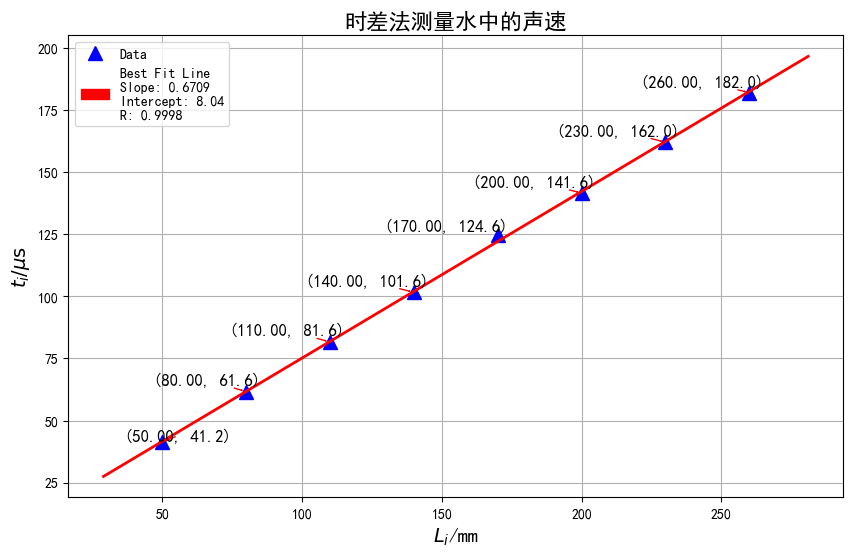

Results of 时差法测量水中的声速:
Best Fit Line
Slope: 0.6709
Intercept: 8.04
R: 0.9998
时差法测量水中的声速: 1489.95 m/s


In [75]:
# Extracted data for time difference method (水中的声速)
i_time = np.array([1, 2, 3, 4, 5, 6, 7, 8])
L_time = np.array([260.00, 230.00, 200.00, 170.00, 140.00, 110.00, 80.00, 50.00])  # in mm
t_time = np.array([182.0, 162.0, 141.6, 124.6, 101.6, 81.60, 61.60, 41.20])  # in µs

# Linear regression
slope_time, intercept_time, r_value_time, p_value_time, std_err_time = stats.linregress(t_time, L_time)
speed_time = slope_time * 10**3  # speed in m/s (slope in mm/µs converted to m/s)

# Call the linear_fit_plot function for the time difference method
linear_fit_plot(L_time, t_time, title='时差法测量水中的声速', x_label='$L_i$/mm', y_label=r'$t_i / \mu\mathrm{s}$',
                data_annotation='({:.2f}, {:.1f})',
                slope_annotation='{:.4f}',
                intercept_annotation='{:.2f}',
                r_value_annotation='{:.4f}')

print(f"时差法测量水中的声速: {speed_time:.2f} m/s")


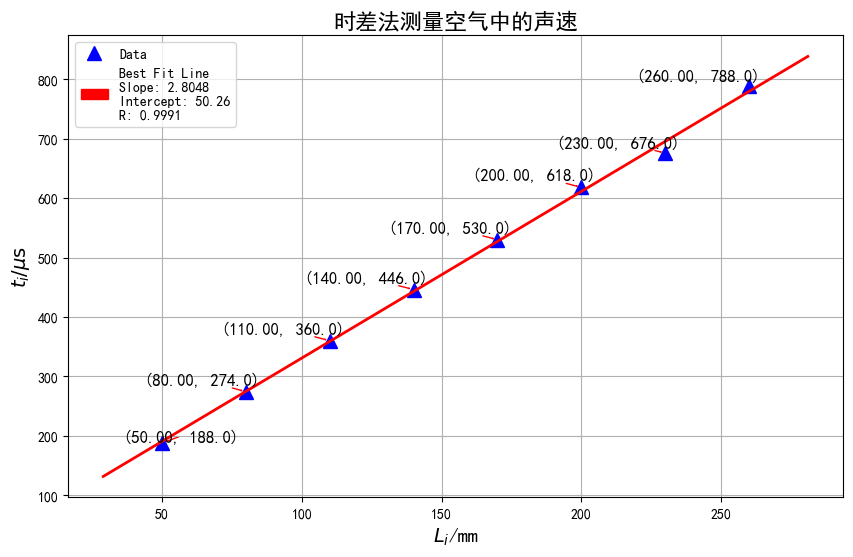

Results of 时差法测量空气中的声速:
Best Fit Line
Slope: 2.8048
Intercept: 50.26
R: 0.9991
时差法测量空气中的声速: 355.92 m/s
Percentage error for time difference method in air: 2.71%


In [76]:
# Extracted data for time difference method (空气中的声速)
i_air = np.array([1, 2, 3, 4, 5, 6, 7, 8])
L_air = np.array([260.00, 230.00, 200.00, 170.00, 140.00, 110.00, 80.00, 50.00])  # in mm
t_air = np.array([788.0, 676.0, 618.0, 530.0, 446.0, 360.0, 274.0, 188.0])  # in µs

# Linear regression
slope_air, intercept_air, r_value_air, p_value_air, std_err_air = stats.linregress(t_air, L_air)
speed_air = slope_air * 10**3  # speed in m/s (slope in mm/µs converted to m/s)

# Call the linear_fit_plot function for the time difference method in air
linear_fit_plot(L_air, t_air, title='时差法测量空气中的声速', x_label='$L_i$/mm', y_label=r'$t_i / \mu\mathrm{s}$',
                data_annotation='({:.2f}, {:.1f})',
                slope_annotation='{:.4f}',
                intercept_annotation='{:.2f}',
                r_value_annotation='{:.4f}')

print(f"时差法测量空气中的声速: {speed_air:.2f} m/s")

# Calculate percentage error
percentage_error_air = abs((C_t - speed_air) / C_t) * 100

print(f"Percentage error for time difference method in air: {percentage_error_air:.2f}%")


In [77]:
# pgf_with_latex = {                      # setup matplotlib to use latex for output
#     "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
#     "text.usetex": True,                # use LaTeX to write all text
#     "font.family": "serif",
#     "font.serif": [],                   # blank entries should cause plots
#     "font.sans-serif": [],              # to inherit fonts from the document
#     "font.monospace": [],
#     "axes.labelsize": 10,               # LaTeX default is 10pt font.
#     "font.size": 10,
#     "legend.fontsize": 8,               # Make the legend/label fonts
#     "xtick.labelsize": 8,               # a little smaller
#     "ytick.labelsize": 8,
#     "figure.figsize": figsize(0.9),     # default fig size of 0.9 textwidth
#     "pgf.preamble": "\n".join([ # plots will use this preamble
#         r"\usepackage[utf8]{inputenc}",
#         r"\usepackage[T1]{fontenc}",
#         r"\usepackage[detect-all,locale=DE]{siunitx}",
#         ])
#     }
# mpl.rcParams.update(pgf_with_latex)